In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from splinter import Browser
from selenium.webdriver.chrome.service import Service
import os
driver_path = r'C:\Users\lnorm\Downloads\chromedriver_win32 (1)\chromedriver.exe'
browser = Browser("chrome",service=Service(executable_path=driver_path))

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# open website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [3]:
# create a BeutifulSoup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [4]:
# extract all rows of data
tables = soup.find('table', class_='table')
print(tables)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [5]:
# create an empty list
table_list = []
rows = tables.find_all('tr')

# loop through the scraped data to create a list of rows

for row in rows:
    td = row.find_all('td')
    row = [row.text.strip() for row in td if row.text.strip()]
    if row:
        table_list.append(row)
        
mars_table = pd.DataFrame(table_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [6]:
mars_table

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# examine data type of each column
mars_table.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
# change data types for data analysis
mars_table['terrestrial_date'] = pd.to_datetime(mars_table['terrestrial_date'])
mars_table['sol'] = mars_table['sol'].astype('int')
mars_table['ls'] = mars_table['ls'].astype('int')
mars_table['month'] = mars_table['month'].astype('int')
mars_table['min_temp'] = mars_table['min_temp'].astype('float')
mars_table['pressure'] = mars_table['pressure'].astype('float')

In [9]:
# confirm type changes were successful by examining data types again
mars_table.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

# Analyze the Data

In [10]:
# 1. How many months are there on Mars?
mars_months =  mars_table['month'].max()
print(f"Mars has {mars_months} months")

Mars has 12 months


In [11]:
# 2. How many Martian days' worth of data are there?
days = mars_table['sol'].count()
print(f"There are {days} Martian days worth of data")

There are 1867 Martian days worth of data


In [12]:
# create new DataFrame with just month and min_temp values
months_df = mars_table[['month', 'min_temp']].set_index('month').sort_index()
# 3. What is the average low temperature by month?
average_temp = months_df.groupby(['month']).mean()
average_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


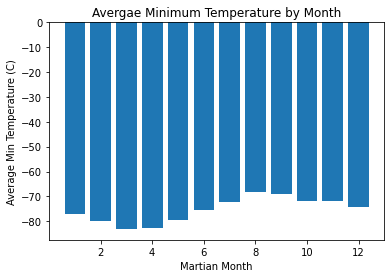

In [13]:
# Plot the average temperature by month
plt.bar(average_temp.index, average_temp['min_temp'])
plt.xlabel("Martian Month")
plt.ylabel("Average Min Temperature (C)")
plt.title('Avergae Minimum Temperature by Month')
plt.show()

In [14]:
# Identify the coldest and hottest months in Curiosity's location
coldest_temp = average_temp['min_temp'].min()
coldest_month = average_temp['min_temp'].idxmin()
hottest_temp = average_temp['min_temp'].max()
hottest_month = average_temp['min_temp'].idxmax()
print(f"Month {coldest_month} was the coldest month with an average temperature of {coldest_temp} Celcius")
print(f"Month {hottest_month} was the coldest month with an average temperature of {hottest_temp} Celcius")

Month 3 was the coldest month with an average temperature of -83.30729166666667 Celcius
Month 8 was the coldest month with an average temperature of -68.38297872340425 Celcius


In [15]:
# create new DataFrame with just month and pressure values
pressure_df = mars_table[['month', 'pressure']].set_index('month').sort_index()
# 4. Average pressure by Martian month
avg_pressure = pressure_df.groupby(['month']).mean()
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


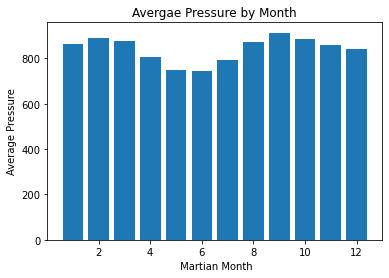

In [16]:
# Plot the average pressure by month
plt.bar(avg_pressure.index, avg_pressure['pressure'])
plt.xlabel(" Martian Month")
plt.ylabel("Average Pressure")
plt.title('Avergae Pressure by Month')
plt.show()

In [17]:
# Identify the months that had the highest and lowest atmospheric pressure
lowest = avg_pressure['pressure'].min()
lowest_month = avg_pressure['pressure'].idxmin()
highest = avg_pressure['pressure'].max()
highest_month = avg_pressure['pressure'].idxmax()
print(f"Month {lowest_month} had the lowest atmospheric pressure of {lowest}")
print(f"Month {highest_month} had the highest atmospheric pressure of {highest}")

Month 6 had the lowest atmospheric pressure of 745.0544217687075
Month 9 had the highest atmospheric pressure of 913.3059701492538


In [18]:
# How many terrestrial (earth) days are there in a Martian year?
# find the first date of the table and longitude
days_df = mars_table[['terrestrial_date', 'ls']]
days_df.head(1)

,terrestrial_date,ls
0,2012-08-16,155


In [19]:
# solar latitude should be in the same position at the one year mark
# find the all dates that have the same latitude as first day of exploration
same_longitude = days_df.loc[days_df['ls'] == 155]
same_longitude.head(2)

,terrestrial_date,ls
0,2012-08-16,155
598,2014-07-03,155


In [20]:
# find how many days are between both terrestrial dates
from datetime import date
first_date = date(2012, 8, 16)
last_date = date(2014, 7, 3)
days = last_date - first_date
# answer: How many terrestrial (earth) days are there in a Martian year?
print(f'There are {days.days} terrestrial (earth) days in a Martian year!')

There are 686 terrestrial (earth) days in a Martian year!


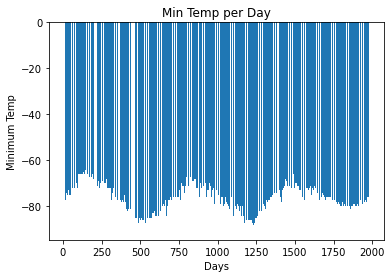

In [21]:
# visually estimate the result by plotting the daily minimum temperature.
sol_min_temp = mars_table[['sol', 'min_temp']]
plt.bar(sol_min_temp['sol'], sol_min_temp['min_temp'])
plt.xlabel("Days")
plt.ylabel("Minimum Temp")
plt.title('Min Temp per Day')
plt.show()

### Each valley (low point) represents one Martian year; there are a total of 3. 1867 (days of data) divided by 3 (Martian years) equals 622.3 days. Therefore, the chart suggests that there are 622.3 earth days per Martian year. 

In [22]:
# write the data to a CSV
mars_table.to_csv('Mission_to_Mars.csv')

In [23]:
browser.quit()